In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import uproot
sys.path.append("../")
import saq


Welcome to JupyROOT 6.28/06


In [2]:
# Define the list of file paths
root_file_paths = [
   '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_19_26.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_21_29.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_23_44.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_26_55.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_29_49.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_32_07.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_33_27.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_36_02.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_44_19.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_46_42.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_48_36.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_50_51.root',
    '/home/wwz/saq_analysis/calibration/10_10_2023_ch2_ch14/10_10_2023_11_52_00.root',
]

# Initialize lists to store data for each file
timestamps_list = []
masks_list = []

# Define constants
clock_rate = 30.3e6
nn = 0
cutoff = (2**32) - 1
loop_time = cutoff / clock_rate

real_channel =[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

# Iterate through each root file
for j, root_file_path in enumerate(root_file_paths):
    # Open the ROOT file
    file = uproot.open(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")

    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]
    print(len(timestamps))
    #print(len(mask))

    #print(timestamps[:10])
    #print(mask[:10])
    
    #filtered_timestamps =[]
    #for i in range(len(timestamps)):
        #if mask[i] == 2**(ch-1):
            #filtered_timestamps.append(timestamps[i]
    
    #This line does the same thing as the loop above, but in a more consice and Pythonic way
    filtered_timestamps = [timestamps[i] for i in range(5,len(timestamps)) if mask[i] == real_channel[j]]

    print(len(filtered_timestamps))
    print(filtered_timestamps[:10])

    # Initialize an array to store time in seconds
    time_sec = np.zeros(len(filtered_timestamps))

    # Convert the individual entries to show the time in seconds
    for i in range(len(filtered_timestamps)):
        time_sec[i] = filtered_timestamps[i] / clock_rate + (nn * loop_time)
        if i > 0 and filtered_timestamps[i] < filtered_timestamps[i - 1]:
            nn += 1
            time_sec[i] = float(filtered_timestamps[i] / clock_rate) + float(nn * loop_time)

    # Store the time_sec array in a list
    timestamps_list.append(time_sec)
    masks_list.append(data["ChMask"])

    nn=0

38265
23372
[158784, 166024, 168936, 175768, 182886, 194469, 194745, 643872, 646940, 649946]
31383
19131
[272167, 272171, 272197, 282046, 290829, 299476, 310322, 310330, 310337, 325679]
10223
8301
[475392, 487255, 500507, 516209, 973018, 985264, 999517, 1013673, 1040095, 1483474]
24829
16490
[159243, 163212, 163241, 168542, 168587, 168647, 174751, 181235, 189301, 196656]
11337
8980
[129329, 156685, 590147, 600634, 615671, 632464, 653650, 1093594, 1104621, 1118584]
22121
17536
[37283, 48385, 55203, 69001, 528916, 533181, 539199, 544188, 550215, 556912]
10045
8989
[223191, 669852, 680428, 695148, 709953, 727750, 1174550, 1184948, 1200024, 1215706]
17469
16183
[333779, 340104, 348679, 356257, 365334, 374299, 386099, 833010, 838571, 844459]
11174
11169
[3878304715, 3878328147, 3878763630, 3878772250, 3878784417, 3878798607, 3878813950, 3878843255, 3879269702, 3879278559]
21996
21991
[64482, 494259, 499146, 503985, 508140, 512784, 519355, 525325, 532696, 539726]
16001
15996
[138570, 556930,

/home/wwz/.virtualenvs/nrta/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wwz/.virtualenvs/nrta/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


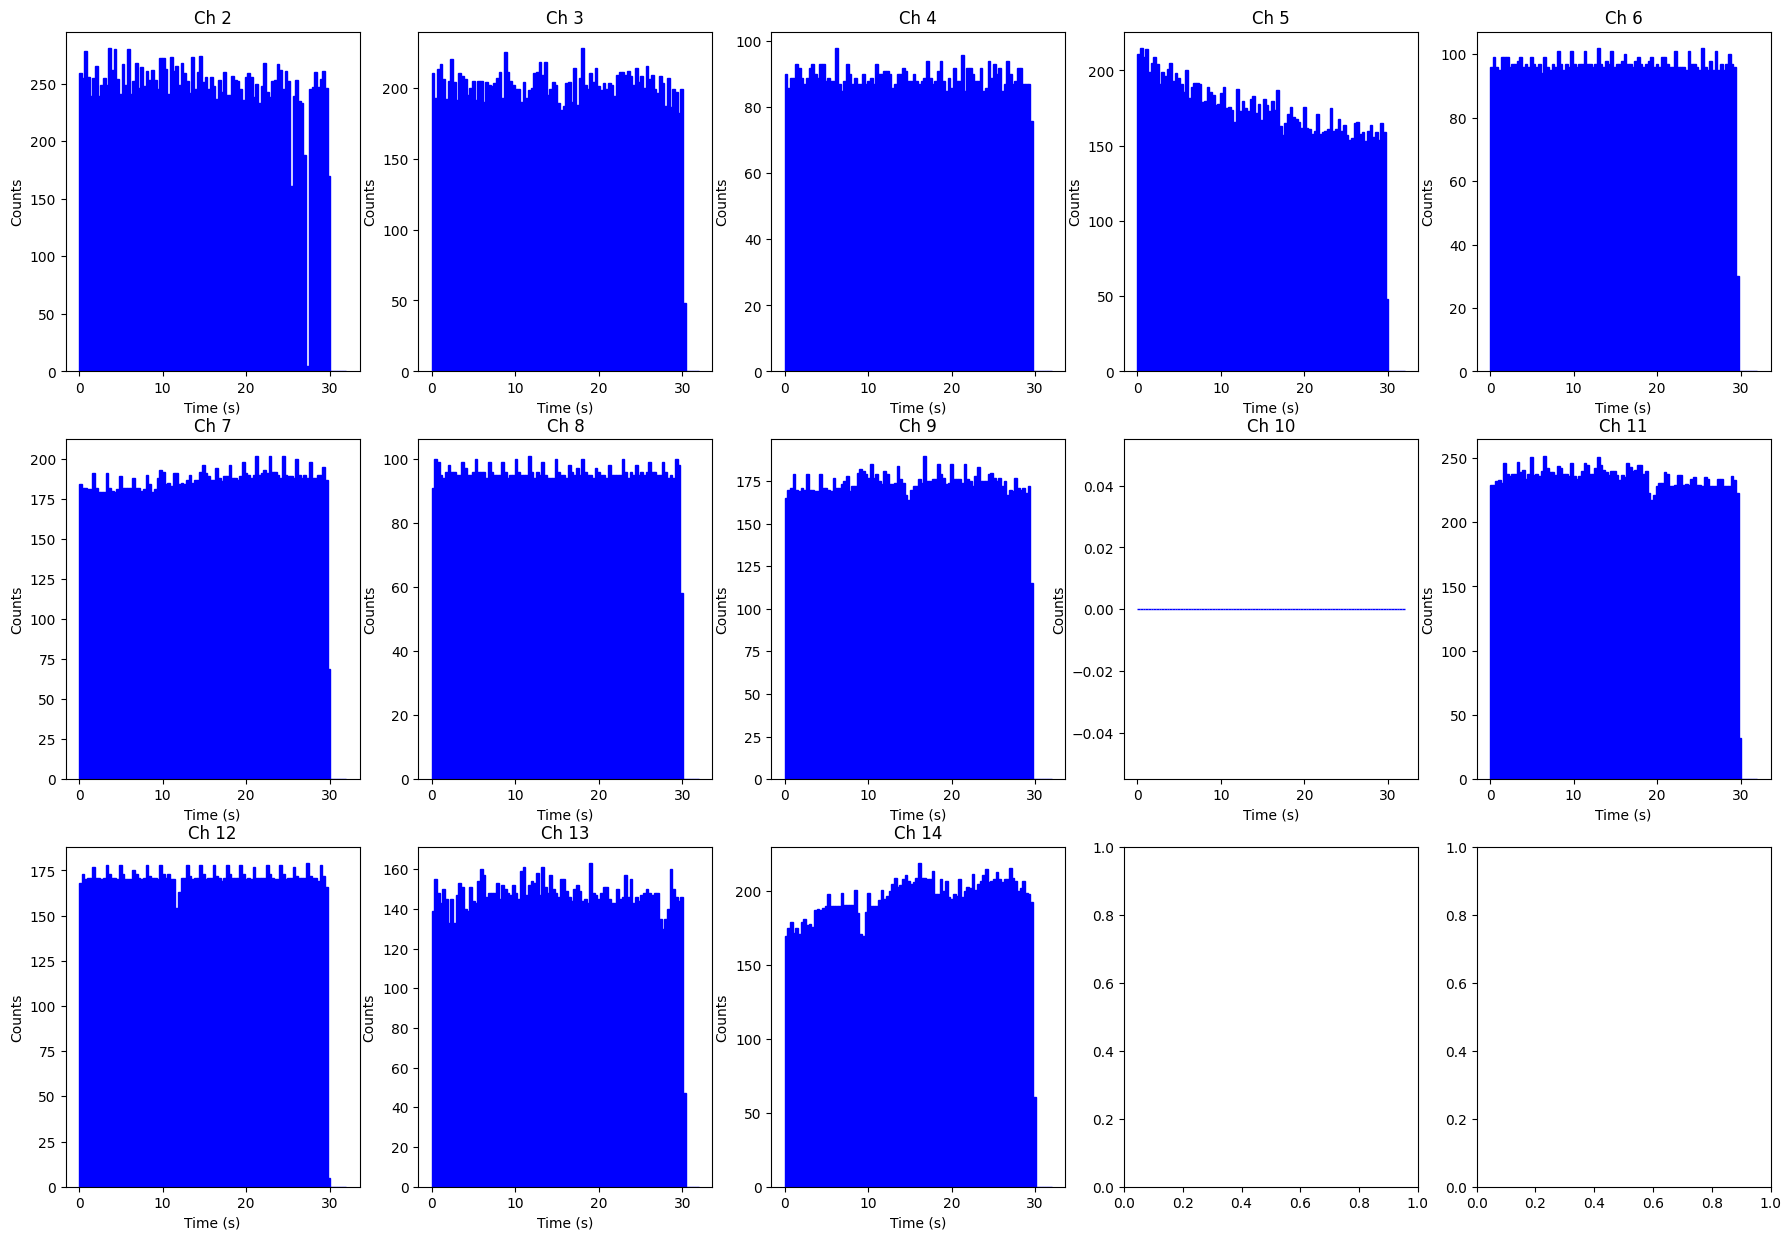

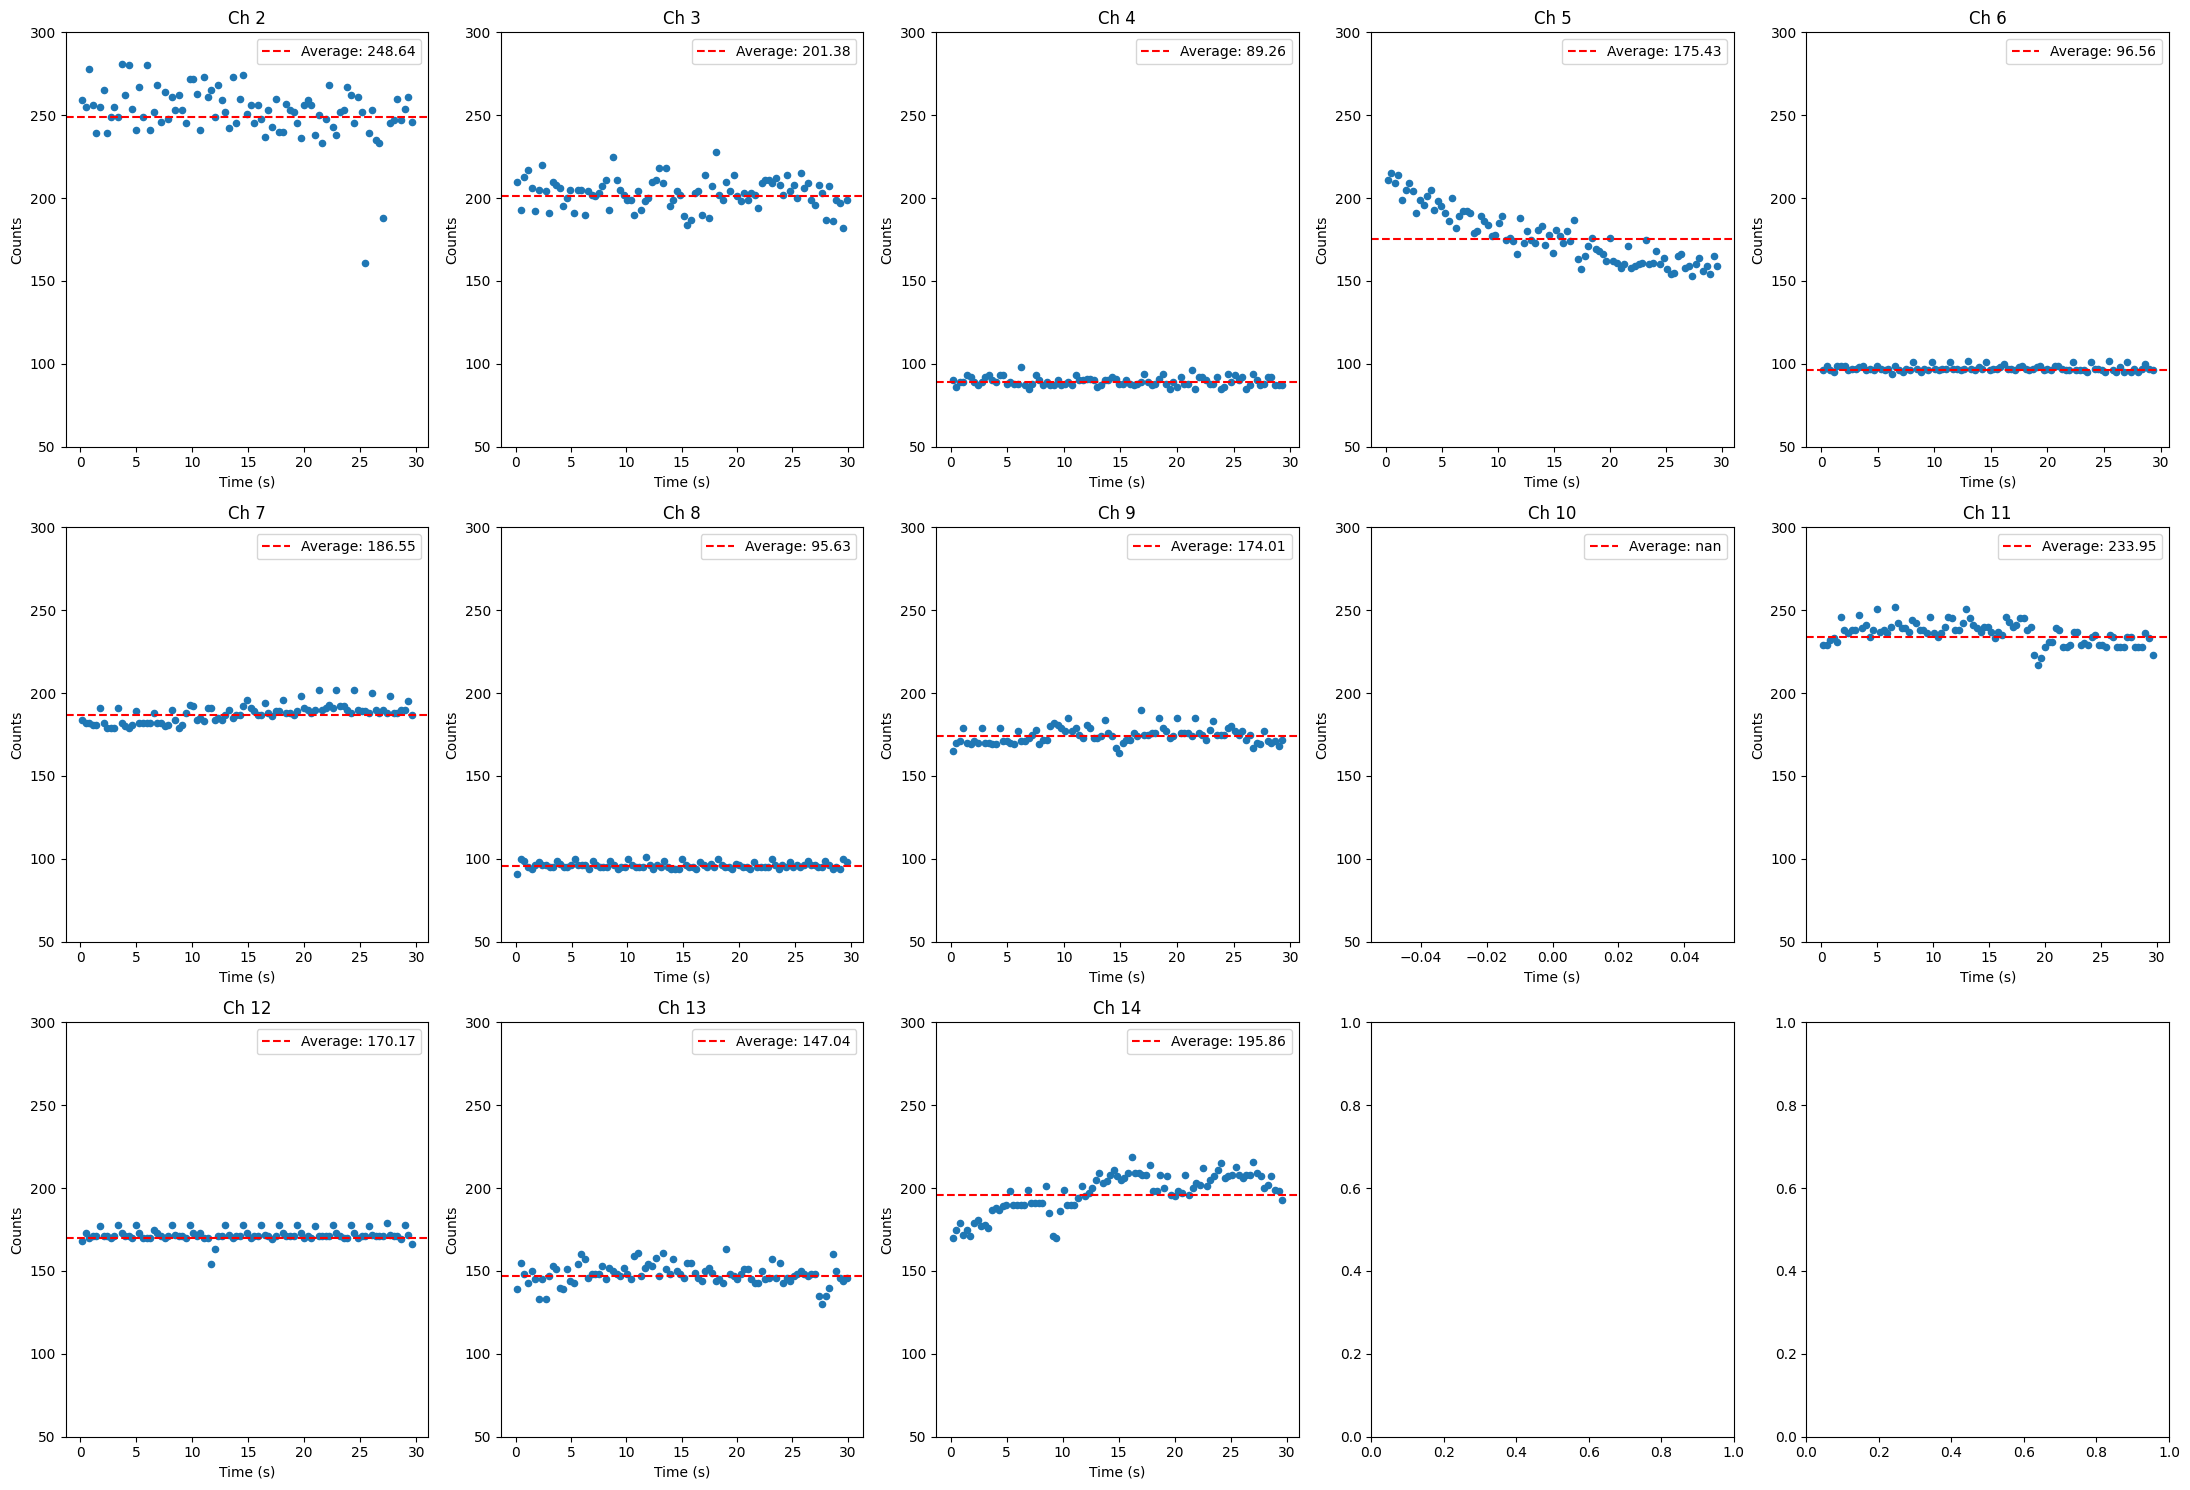

In [3]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 15))

# Create lists to store bin content from each histogram
bin_contents = []
bin_center=[]

# Create lists to store averages for each channel
averages = []

# Loop through your data and create histograms
for i in range(13):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(timestamps_list[i], range=[0, 32], bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts')
    ax.set_title(f'Ch {i + 2}')

  # Store the bin content in the bin_contents list
    bin_contents.append(hist)
    bin_center.append(bins)

# Create a new 3x5 subplot grid to display the scatter plots of bin content
fig2, axes2 = plt.subplots(3, 5, figsize=(22, 15))

for i, content in enumerate(bin_contents):
    # Calculate the center of each bin
    bin_centers = (bin_center[i][:-1] + bin_center[i][1:]) / 2

    # Filter out bins with zero bin content
    non_zero_bins = content != 0
    avg = np.mean(content[non_zero_bins])
    averages.append(avg)

    # Scatter plot of non-zero bin content in the new subplot grid with specified range
    row = i // 5
    col = i % 5
    ax2 = axes2[row, col]
    ax2.scatter(bin_centers[non_zero_bins][:-1], content[non_zero_bins][:-1], marker='o', s=20)

    # Draw the average line on the scatter plot
    ax2.axhline(y=averages[i], color='red', linestyle='--', label=f'Average: {averages[i]:.2f}')

    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Counts')
    ax2.set_title(f'Ch {i + 2}')
    ax2.set_ylim(50, 300)
    ax2.legend()

plt.tight_layout()
plt.show()

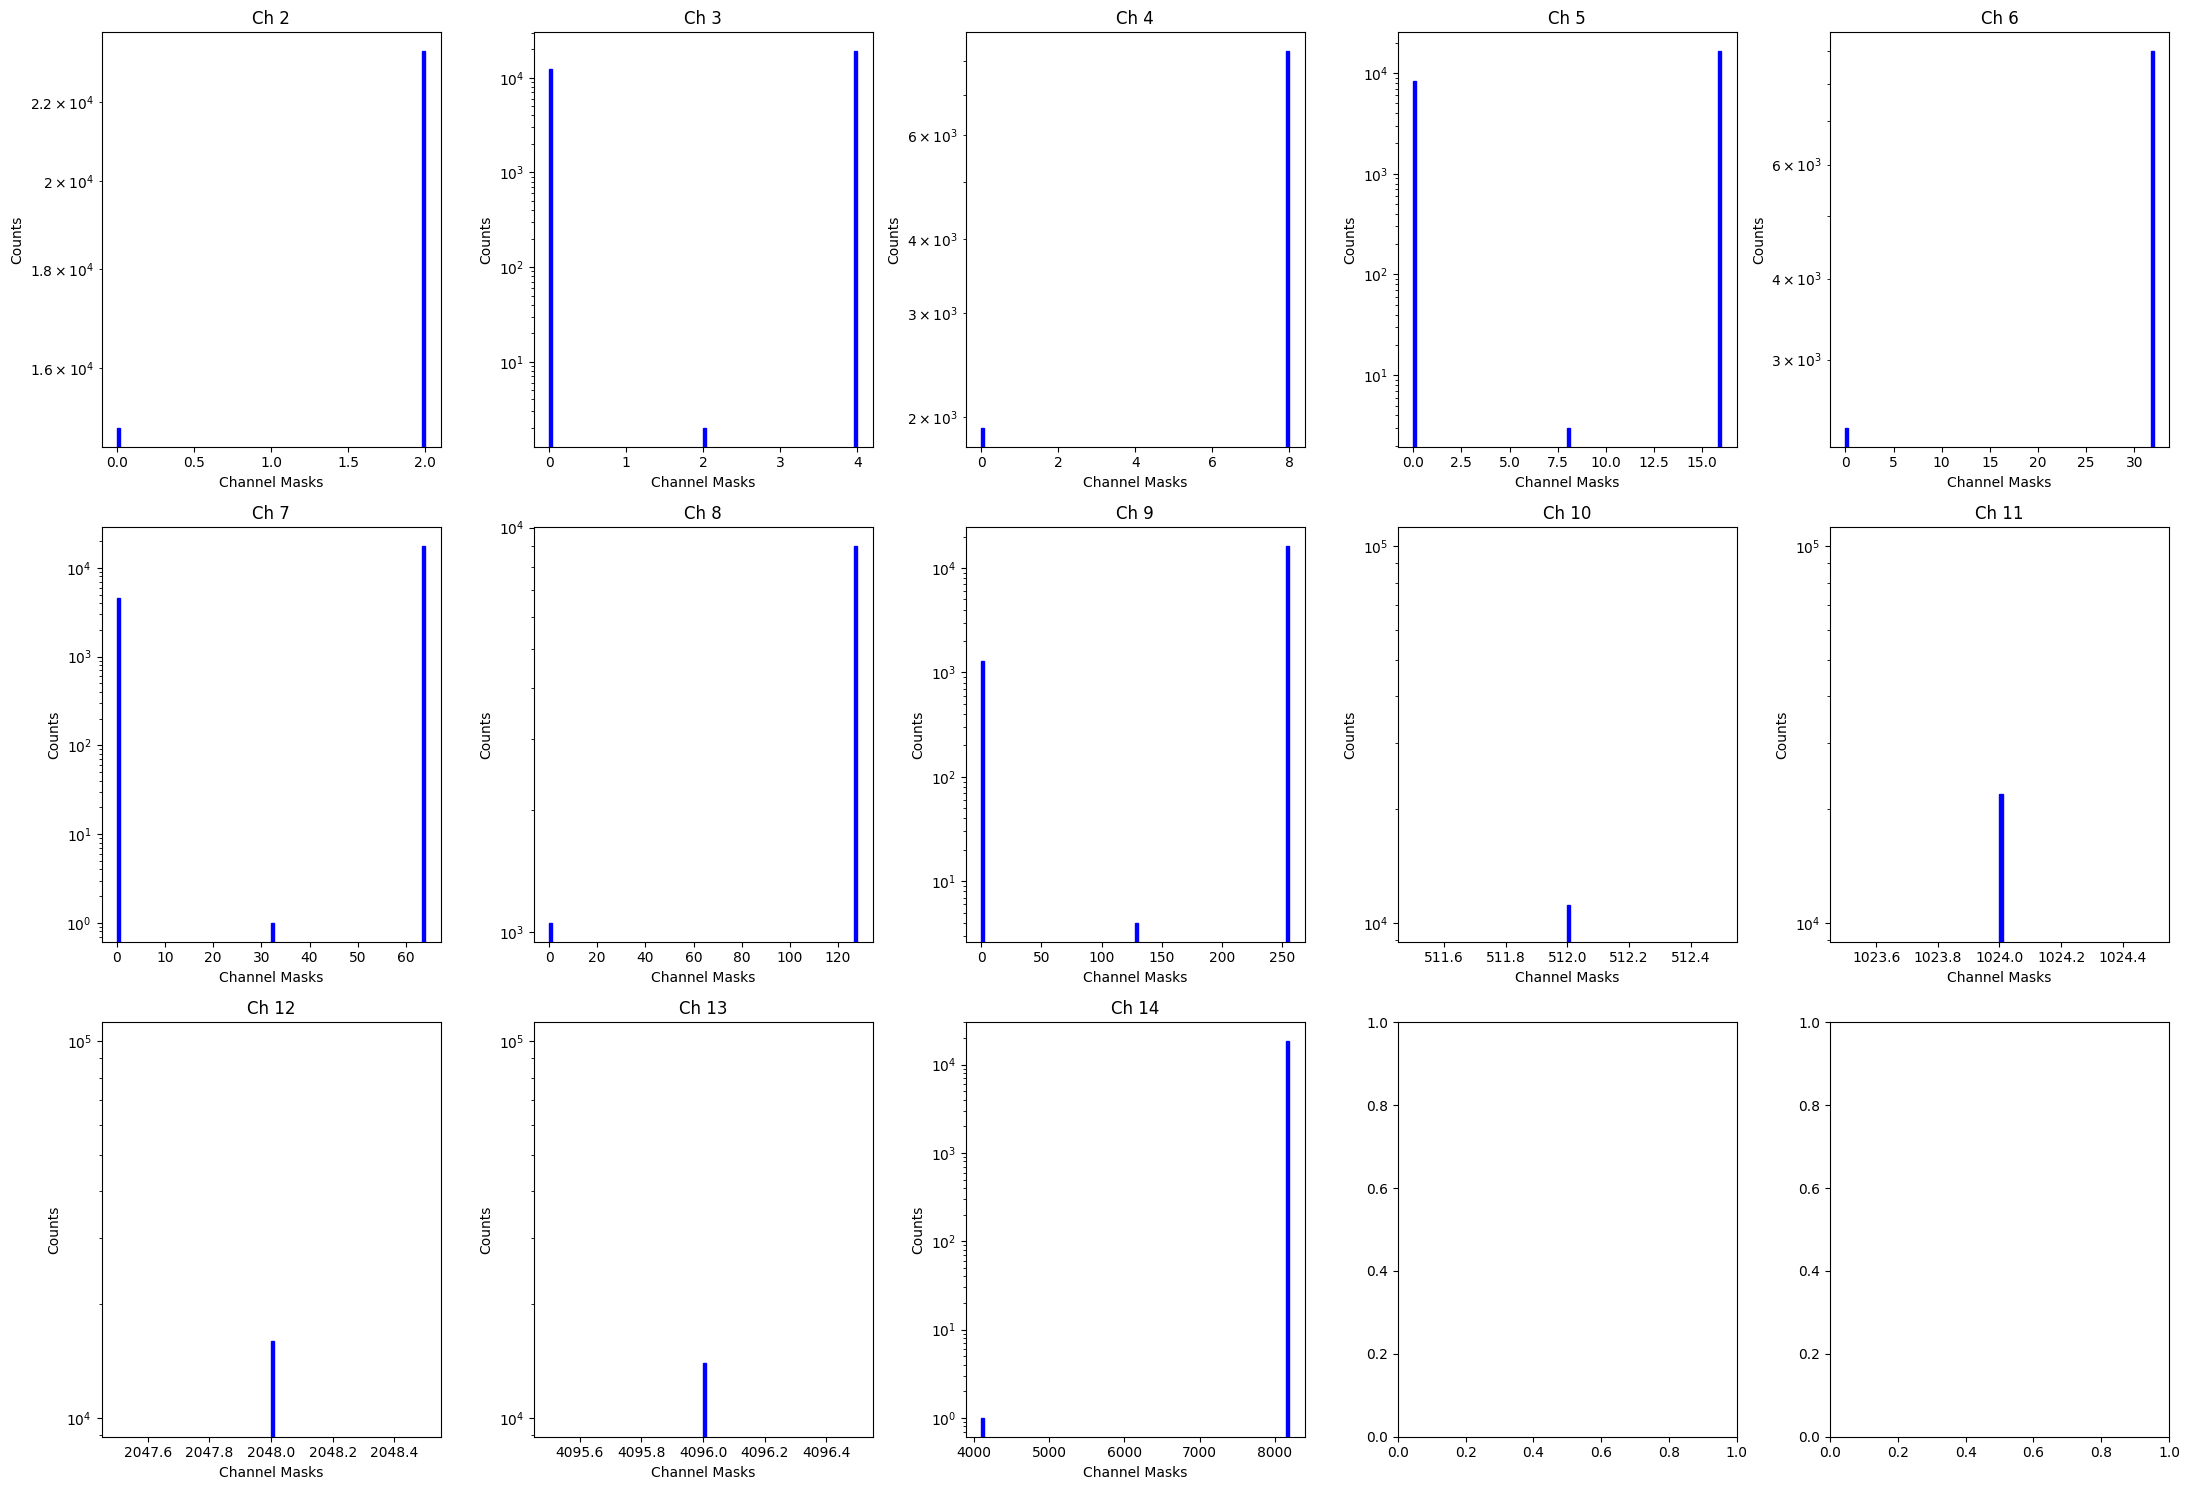

In [4]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 15))

# Loop through your data and create histograms
for i in range(13):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(masks_list[i], bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Channel Masks')
    ax.set_ylabel('Counts')
    ax.set_yscale('log')
    ax.set_title(f'Ch {i + 2}')

plt.tight_layout()
plt.show()

ch 2  ,mean rtd:  0.0015018702258262652  ,std rtd:  0.004117062063866313
ch 2  ,mean charge:  7.509351129131326  ,std charge:  20.585310319331565
ch 3  ,mean rtd:  0.0021871766789132697  ,std rtd:  0.00470907264297478
ch 3  ,mean charge:  10.935883394566348  ,std charge:  23.545363214873902
ch 4  ,mean rtd:  0.003668565416586134  ,std rtd:  0.0059051681136174546
ch 4  ,mean charge:  18.34282708293067  ,std charge:  29.525840568087272
ch 5  ,mean rtd:  0.0019071672174245289  ,std rtd:  0.00453570252018089
ch 5  ,mean charge:  9.535836087122645  ,std charge:  22.678512600904448
ch 6  ,mean rtd:  0.003290358034689139  ,std rtd:  0.0055431877646038435
ch 6  ,mean charge:  16.451790173445694  ,std charge:  27.71593882301922
ch 7  ,mean rtd:  0.0017045593257111605  ,std rtd:  0.004370960330295732
ch 7  ,mean charge:  8.522796628555803  ,std charge:  21.85480165147866
ch 8  ,mean rtd:  0.003332049333104205  ,std rtd:  0.005661077952680898
ch 8  ,mean charge:  16.660246665521026  ,std charge: 

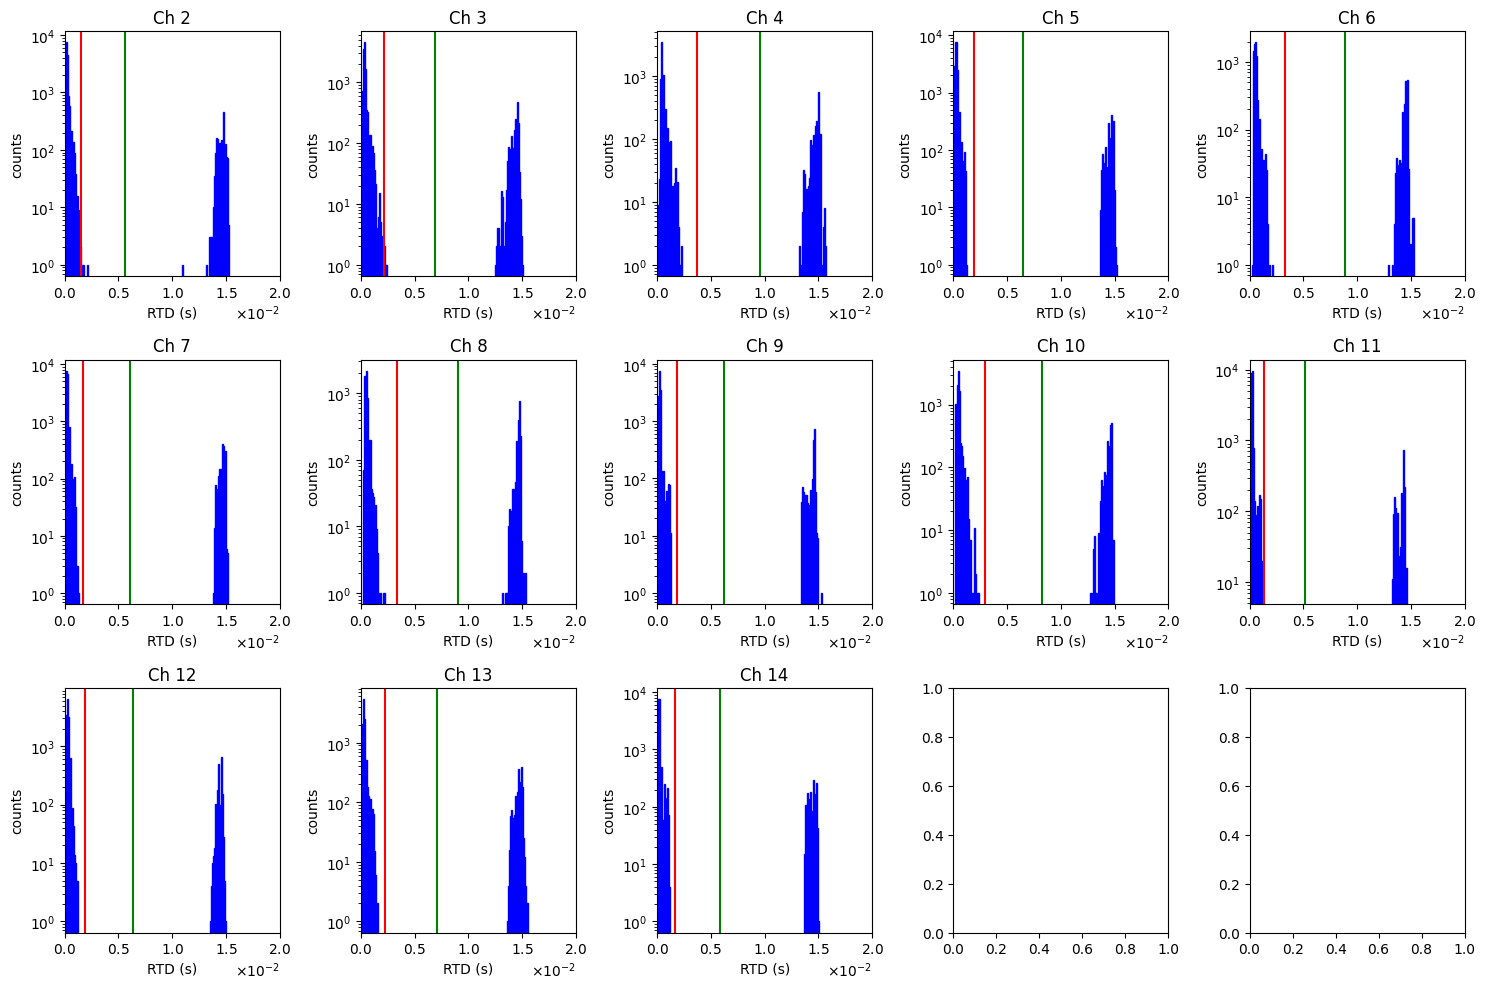

In [18]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

j=2

mean_charge = [] # To store the mean charge per reset for each channel
std_charge = [] # To store the standard deviation for the mean charge per reset for each channel

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  # Example lower cutoff
    upper_cutoff = 5e-2  # Example upper cutoff

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]

    mean_rtd = np.mean(filtered_rtd)
    std_rtd = np.std(filtered_rtd)

#Calcuate the mean charge per reset for each channel
    mean_Q = mean_rtd * 5000 # The charge is in pC since rtd is in s and current is in pA
    std_Q = std_rtd * 5000

    mean_charge.append(mean_Q)
    std_charge.append(std_Q)

    print("ch", j, " ,mean rtd: ",  mean_rtd, " ,std rtd: ", std_rtd)
    print("ch", j, " ,mean charge: ",  mean_Q, " ,std charge: ", std_Q)
    j = j+1



# Create a histogram of the filtered differences

    # Create a histogram of time differences
    ax.hist(filtered_rtd, bins=500,range=(0, 0.05), color='blue', alpha=1, edgecolor='blue')
    ax.axvline(mean_rtd, color = 'red')
    ax.axvline(mean_rtd-std_rtd , color = 'green')
    ax.axvline(mean_rtd+std_rtd, color = 'green')
    
    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))  # Apply scientific notation

     # Add titles (labels) to x and y axes
    ax.set_xlabel('RTD (s)')  # Replace with your desired x-axis label
    ax.set_ylabel('counts')  # Replace with your desired y-axis label

    # Define your desired x-axis range
    x_min = 0  # Replace with your desired minimum x-axis value
    x_max = 0.02  # Replace with your desired maximum x-axis value

     # Set the x-axis range
    ax.set_xlim(x_min, x_max)
    ax.set_yscale('log')
    ax.set_title(f'Ch {i + 2}')

plt.tight_layout()
plt.show()

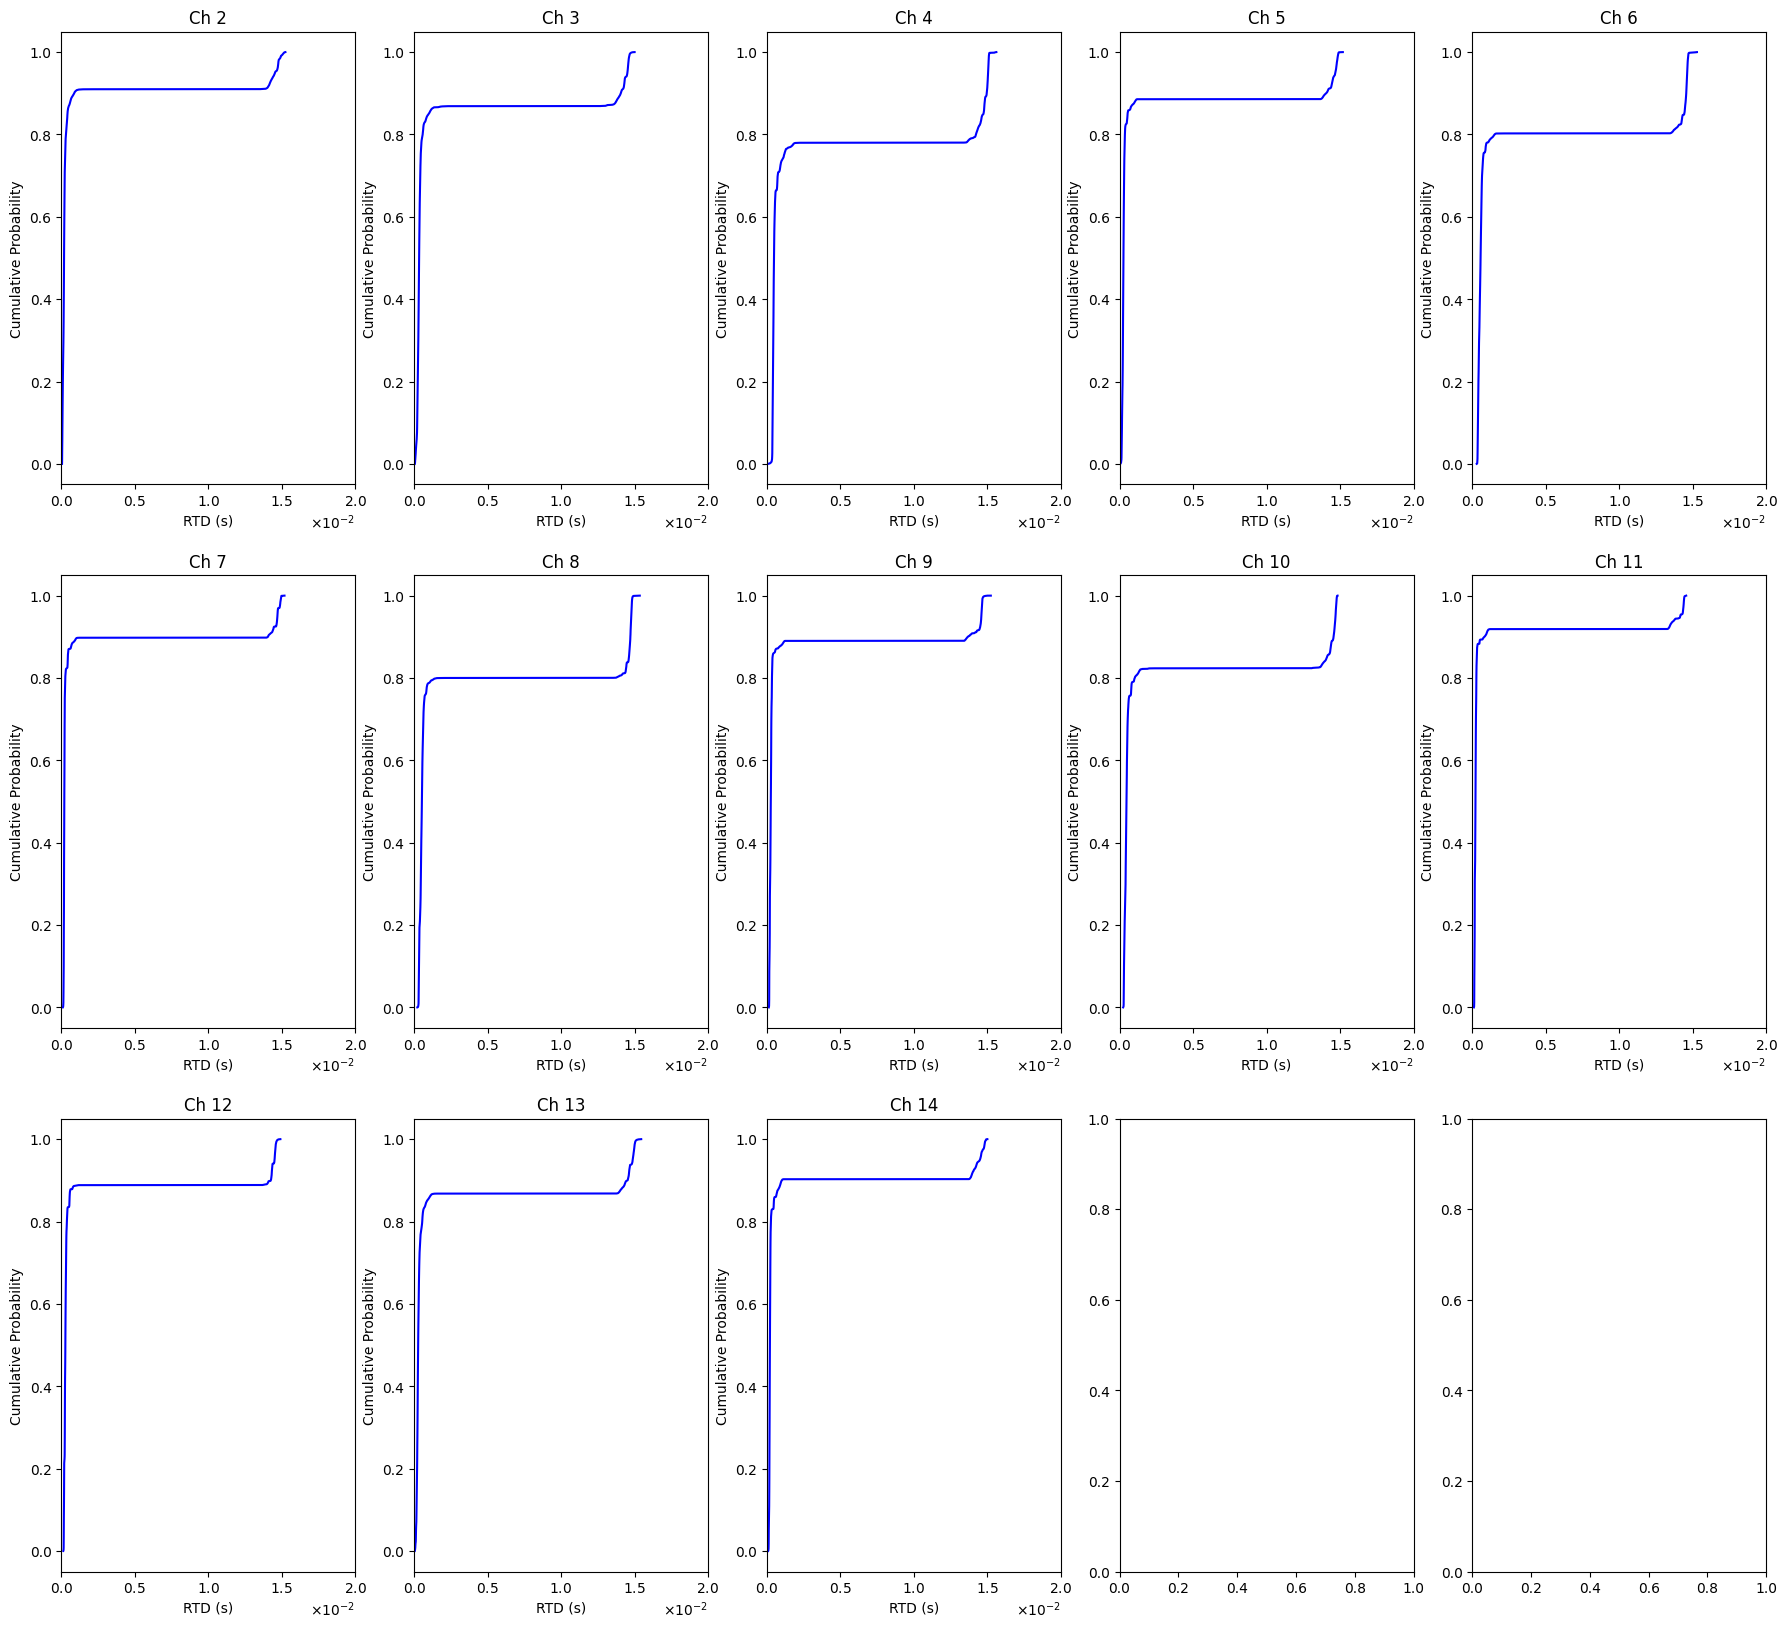

In [21]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 20))

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  # Example lower cutoff
    upper_cutoff = 5e-2  # Example upper cutoff

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]

 # Calculate the cumulative distribution
    sorted_rtd = np.sort(filtered_rtd)
    cumulative_prob = np.arange(1, len(sorted_rtd) + 1) / len(sorted_rtd)

    ax.plot(sorted_rtd, cumulative_prob, color='blue')

    
    # Add labels and a title
    ax.set_xlabel('RTD (s)')
    ax.set_ylabel('Cumulative Probability')
    ax.set_title(f'Ch {i+2}')

    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

    # Define your desired x-axis range
    x_min = 0  # Replace with your desired minimum x-axis value
    x_max = 0.02 # Replace with your desired maximum x-axis value

    # Set the x-axis range
    ax.set_xlim(x_min, x_max)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
The average charege per reset is:  11.309841753228616 pC
The average charege per reset is:  11.336 pC


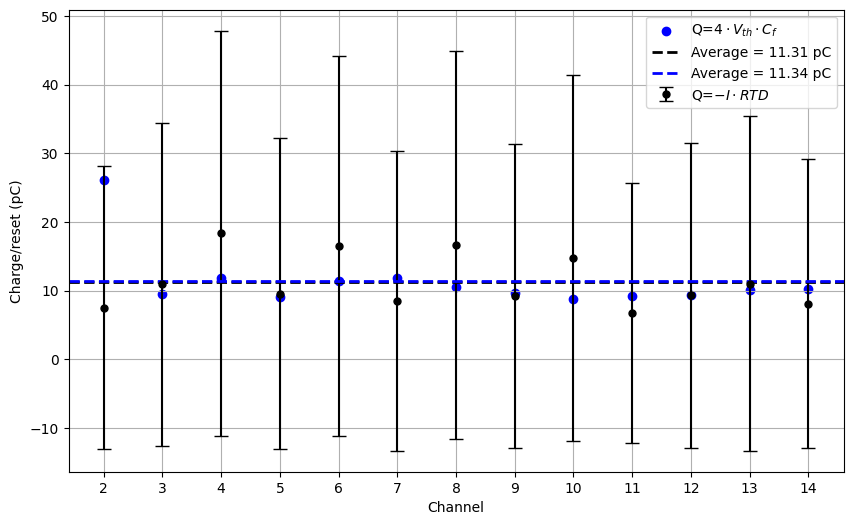

In [22]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

Q_vdd = [26.128, 9.516, 11.76, 9.06, 11.42, 11.856, 10.46, 9.688, 8.732, 9.176, 9.28, 10.072, 10.22] #calculated charge per reset from C*Vdd*4, where Vdd are measurements for ch 2 to 14

# Define the range of channels to plot
start_channel = 2  # Start channel
end_channel = 14  # End channel

# Create a list of channel numbers within the specified range
x_channels = list(range(start_channel, end_channel+1))
print(x_channels)

#x_channels =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# Plot the average charge per reset with error bars
ax.errorbar(x_channels, mean_charge, yerr=std_charge, fmt='o', color='black', markersize=5, capsize=5, label='Q=$-I \cdot RTD$')
plt.scatter(x_channels, Q_vdd, label='Q=$4 \cdot V_{th} \cdot C_{f}$', color='b', marker='o')

# Calculate the average charge of the mean charge for 10 channels
avg_charge_1 = np.mean(mean_charge) #average charge = average rtd in second* 5 nA
avg_charge_2 = np.mean(Q_vdd) #average charge = average rtd in second* 5 nA

# Plot a flat line at the calculated average value
ax.axhline(avg_charge_1, color='black', linestyle='--', label='Average = 11.31 pC', linewidth=2)
print("The average charege per reset is: ", avg_charge_1, "pC")

# Plot a flat line at the calculated average value
ax.axhline(avg_charge_2, color='b', linestyle='--', label='Average = 11.34 pC', linewidth=2)
print("The average charege per reset is: ", avg_charge_2, "pC")

# Configure the x-axis formatter to use integers
ax.set_xticks(x_channels)

# Add labels to x and y axes
ax.set_xlabel('Channel')
ax.set_ylabel('Charge/reset (pC)')

# Show the legend
plt.legend()

# Show the plot

plt.plot()

# Set the x-axis and y-axis range and labels
#ax.set_xlim(start_channel-0.1 , end_channel)
#ax.set_ylim(0, 100)  
ax.grid(True)

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [8]:
data1 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData1.csv", sep=',', skiprows=1)
data2 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData2.csv", sep=',', skiprows=1)
data3 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData3.csv", sep=',', skiprows=1)
data4 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData4.csv", sep=',', skiprows=1)
data5 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData5.csv", sep=',', skiprows=1)
data6 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData6.csv", sep=',', skiprows=1)
data7 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData7.csv", sep=',', skiprows=1)
data8 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData8.csv", sep=',', skiprows=1)
data9 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData9.csv", sep=',', skiprows=1)
data10 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData10.csv", sep=',', skiprows=1)
data11 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData11.csv", sep=',', skiprows=1)
data12 = pd.read_csv("/home/wwz/saq_analysis/calibration/pressure_scan/pressureData12.csv", sep=',', skiprows=1)
data1.head(16)

,1.0,10.879732445619698,14.0
0,2.0,5.564211,31.0
1,3.0,7.247767,61.0
2,4.0,7.287994,108.0
3,5.0,7.485010,171.0
4,6.0,5.352097,154.0
5,7.0,4.418165,158.0
6,8.0,3.388478,216.0
7,9.0,2.663981,208.0
8,10.0,0.454888,74.0
9,11.0,0.082985,36.0


In [9]:
data_frames = []

for i in range(1, 13):
    file_name = f"/home/wwz/saq_analysis/calibration/pressure_scan/pressureData{i}.csv"
    df = pd.read_csv(file_name, delimiter=",", skiprows={1, 15, 16}) # skip channels 1, 15 and 16
    data_frames.append(df)

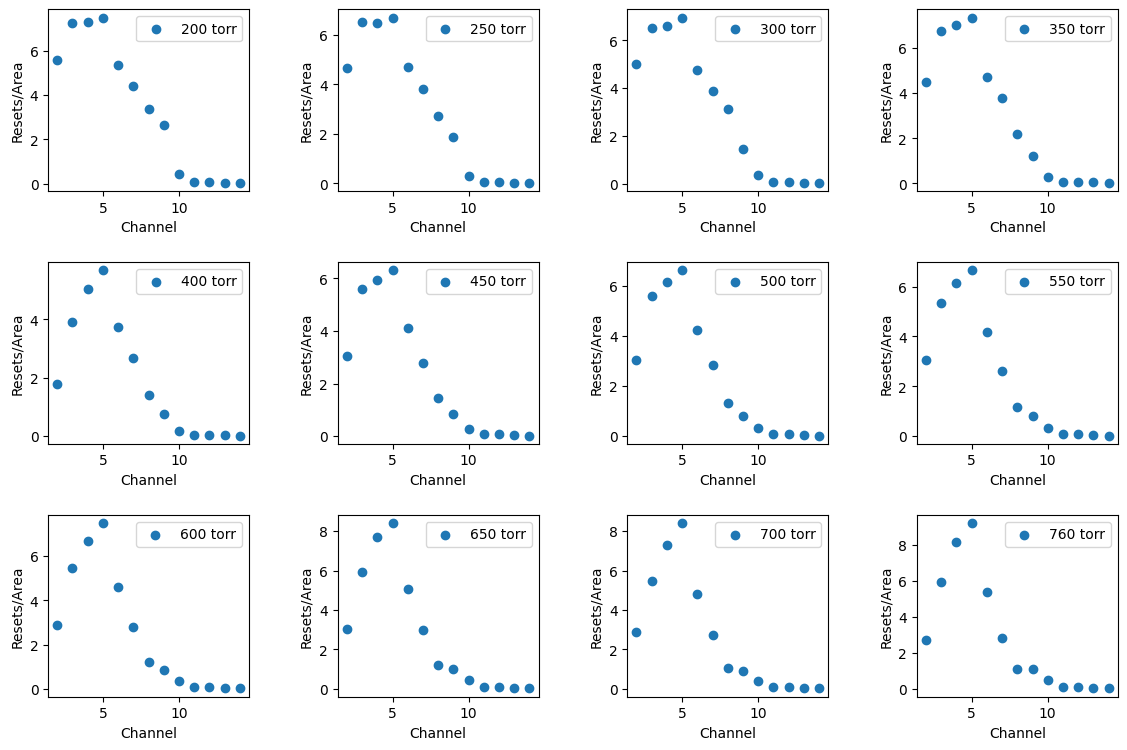

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.tight_layout(pad=3.0)

pressures = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 760]

for i, (df, pressure) in enumerate(zip(data_frames, pressures)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], label= f'{pressure} torr') # df.iloc[:, 0] is the first column in csv data, which is the channel number
    #ax.set_title(f'Distribution {i+1}')
    ax.set_xlabel('Channel')
    ax.set_ylabel('Resets/Area')
    #ax.set_ylim(0, 8)
    ax.legend()

In [11]:
print(saq.radius_of_channel)

[ 0.47376154  1.08855317  1.78272712  2.58085228  3.53032477  4.52659149
  5.52812179  6.78769423  8.82738345 11.31492477 13.81784241 17.68517098
 22.61571865 27.61034335 35.35336763 45.30267516]


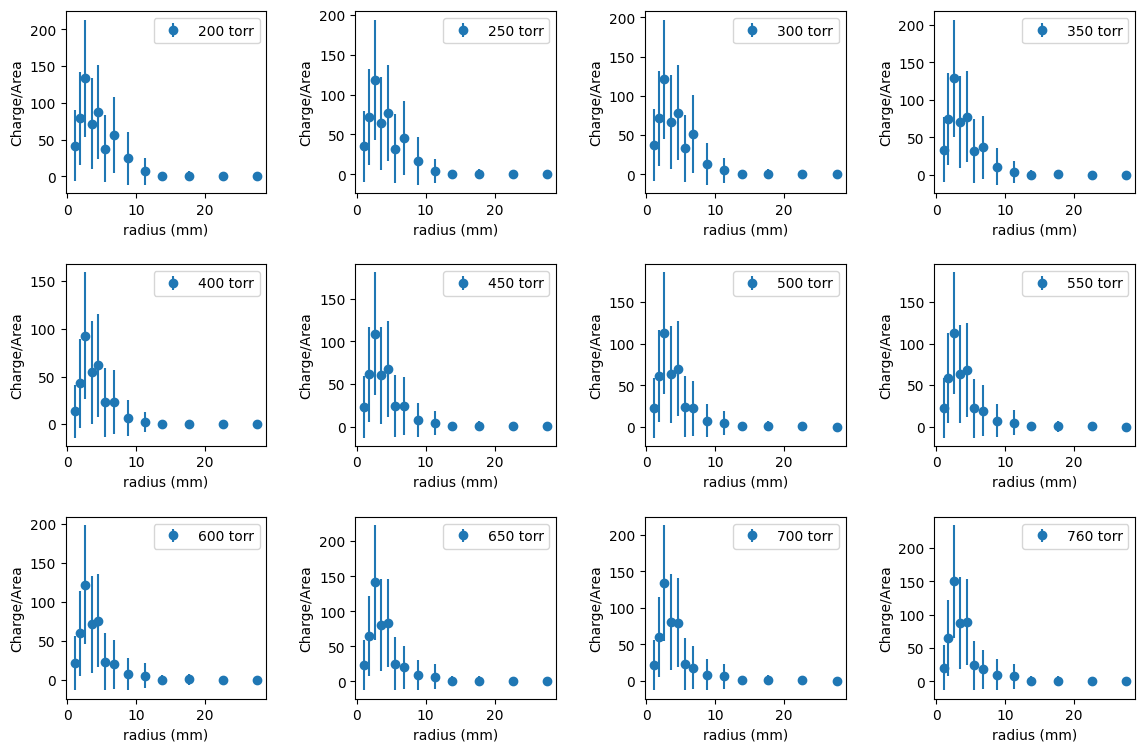

In [12]:

fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.tight_layout(pad=3.0)

pressures = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 760]

for i, (df, pressure) in enumerate(zip(data_frames, pressures)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    #ax.scatter(df.iloc[:, 0], df.iloc[:, 1]*charge_per_reset, label= f'{pressure} torr') # charge/area vs. channels
    #ax.scatter(saq.radius_of_channel[1:-4], df.iloc[:, 1]*charge_per_reset, label= f'{pressure} torr') # charge/area vs. radius without errors
    ax.errorbar(saq.radius_of_channel[1:-2], df.iloc[:, 1]*mean_charge, yerr=df.iloc[:, 1]**(0.5)*std_charge, fmt='o', label= f'{pressure} torr') # charge/area vs. radius with errors
    ax.set_xlabel('radius (mm)')
    ax.set_ylabel('Charge/Area')
    ax.legend()